In [85]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, jaccard_score, accuracy_score
import itertools

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [33]:
df_ha = pd.read_csv('Heart_attack_prediction_data.csv')
df_ha

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [34]:
df_ha.shape

(303, 14)

In [56]:
df_ha.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [35]:
df_ha.info

<bound method DataFrame.info of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
5     57    1   0     140   192    0        1       148     0      0.4    1   
6     56    0   1     140   294    0        0       153     0      1.3    1   
7     44    1   1     120   263    0        1       173     0      0.0    2   
8     52    1   2     172   199    1        1       162     0      0.5    2   
9     57    1   2     150   168    0        1       174     0      1.6    2   
10    54    1   0     140   239    0        1       160     0      1.2    2   
11    48    0   2   

In [38]:
df_ha.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [39]:
df_ha['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

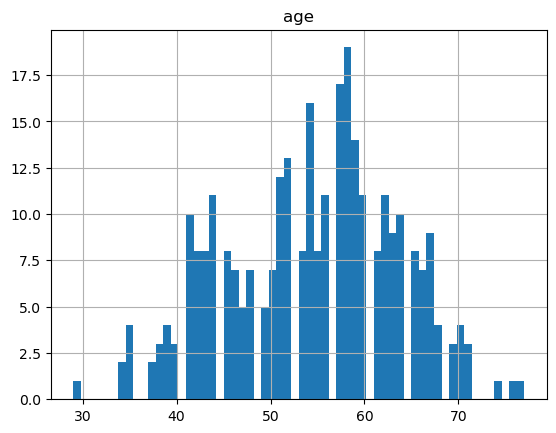

In [40]:
df_ha.hist(column='age',bins=60)

array([[<AxesSubplot:title={'center':'sex'}>]], dtype=object)

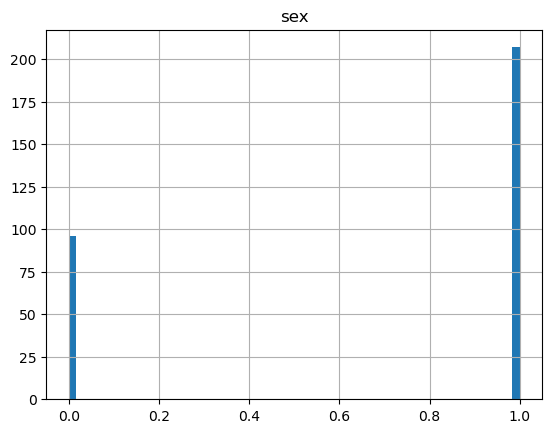

In [41]:
df_ha.hist(column='sex',bins=60)

array([[<AxesSubplot:title={'center':'cp'}>]], dtype=object)

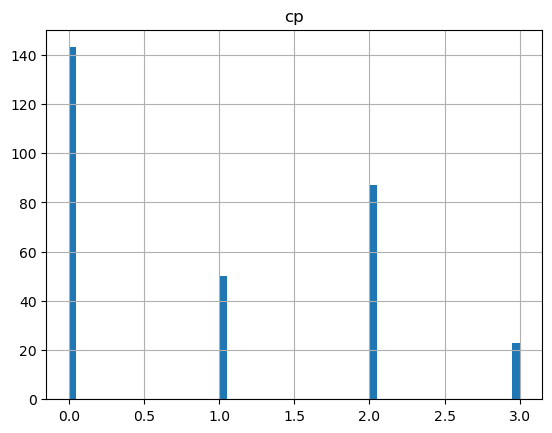

In [42]:
df_ha.hist(column='cp',bins=60)

array([[<AxesSubplot:title={'center':'trtbps'}>]], dtype=object)

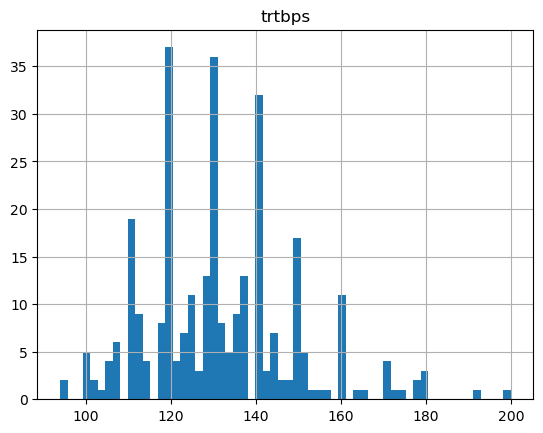

In [43]:
df_ha.hist(column='trtbps',bins=60)

In [44]:
df_ha.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

array([[<AxesSubplot:title={'center':'chol'}>]], dtype=object)

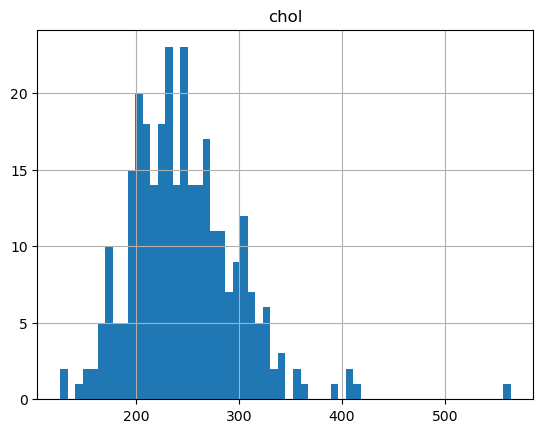

In [45]:
df_ha.hist(column='chol',bins=60)

array([[<AxesSubplot:title={'center':'fbs'}>]], dtype=object)

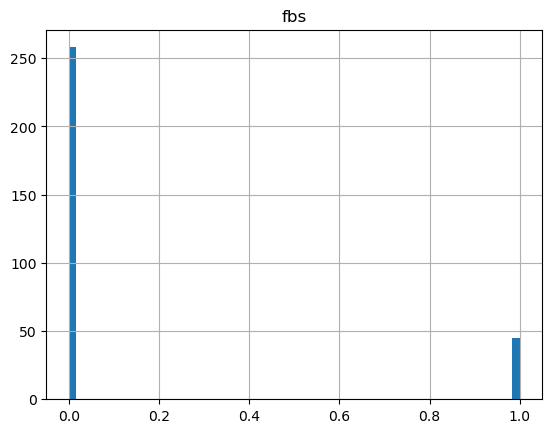

In [46]:
df_ha.hist(column='fbs',bins=60)

array([[<AxesSubplot:title={'center':'restecg'}>]], dtype=object)

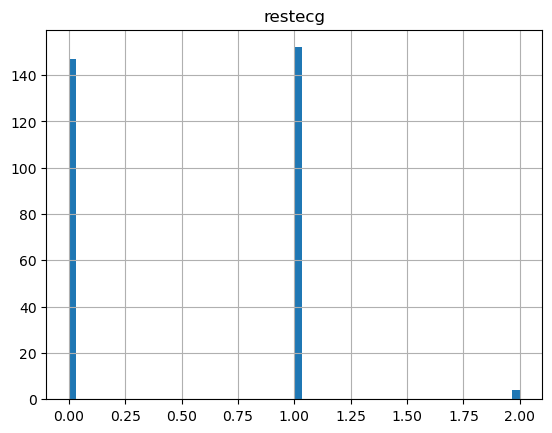

In [47]:
df_ha.hist(column='restecg',bins=60)

array([[<AxesSubplot:title={'center':'thalachh'}>]], dtype=object)

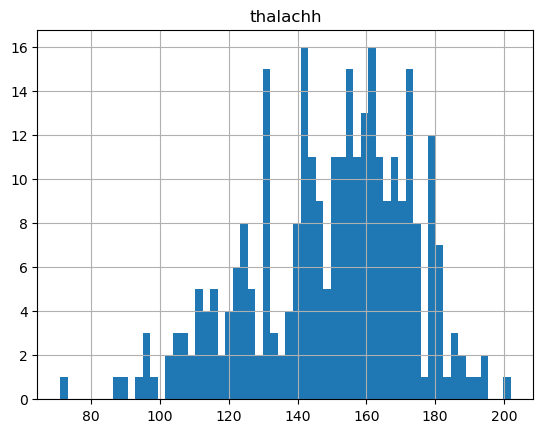

In [48]:
df_ha.hist(column='thalachh',bins=60)

array([[<AxesSubplot:title={'center':'exng'}>]], dtype=object)

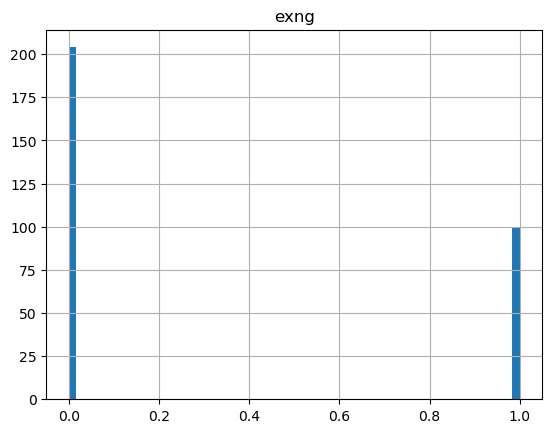

In [49]:
df_ha.hist(column='exng',bins=60)

array([[<AxesSubplot:title={'center':'oldpeak'}>]], dtype=object)

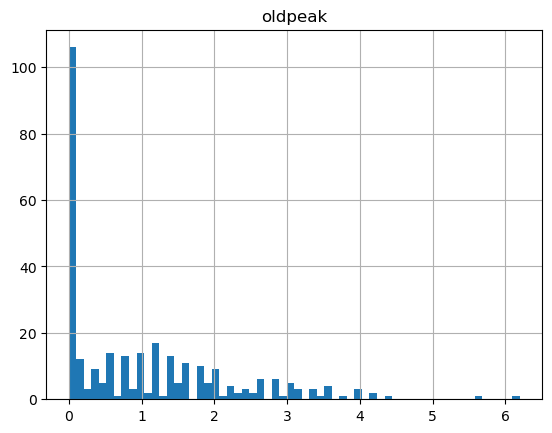

In [50]:
df_ha.hist(column='oldpeak',bins=60)

array([[<AxesSubplot:title={'center':'slp'}>]], dtype=object)

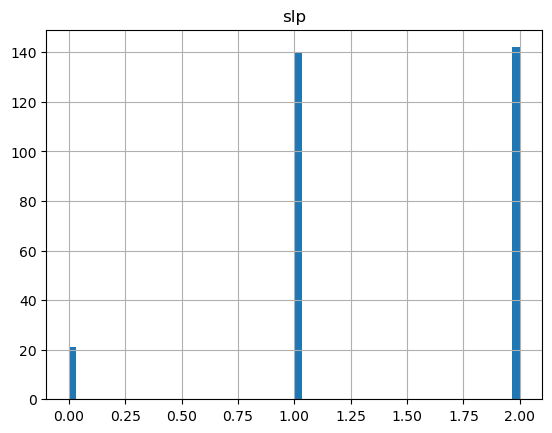

In [51]:
df_ha.hist(column='slp',bins=60)

array([[<AxesSubplot:title={'center':'caa'}>]], dtype=object)

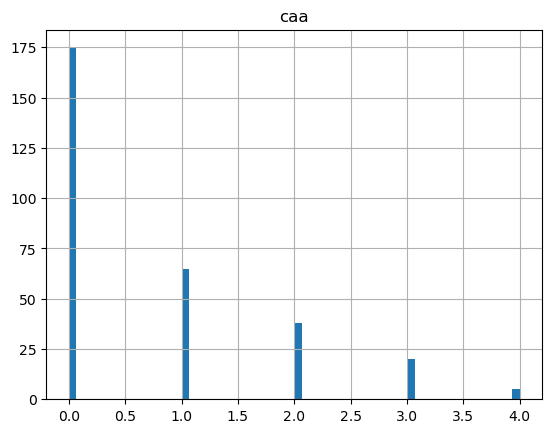

In [52]:
df_ha.hist(column='caa',bins=60)

array([[<AxesSubplot:title={'center':'thall'}>]], dtype=object)

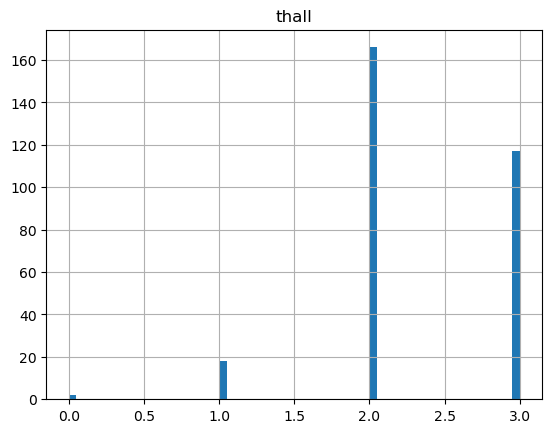

In [53]:
df_ha.hist(column='thall',bins=60)

In [54]:
X = df_ha[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = df_ha['output']

In [57]:
X = preprocessing.StandardScaler().fit_transform(X.astype(float))
X[0:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
        -0.41763453,  0.89896224,  1.23989692, -0.69663055, -0.20670527,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
        -0.41763453,  0.89896224,  0.58393935,  1.43548113, -0.37924438,
         0.97635214, -0.71442887, -0.51292188]])

In [65]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 5)

In [66]:
print('Train set size:',X_train.shape,y_train.shape)
print('Test set size:',X_test.shape,y_test.shape)

Train set size: (242, 13) (242,)
Test set size: (61, 13) (61,)


## developing model using K nearest neighbors

In [169]:
k=7
knb = KNeighborsClassifier(n_neighbors= k).fit(X_train,y_train)
knb

KNeighborsClassifier(n_neighbors=7)

In [170]:
yhat = knb.predict(X_test)
yhat[0:5]

array([1, 0, 0, 0, 1], dtype=int64)

In [171]:
y_test[0:5]

302    0
243    0
268    0
213    0
24     1
Name: output, dtype: int64

In [172]:
from sklearn import metrics

In [173]:

print("Train accuracy:", metrics.accuracy_score(y_train,knb.predict(X_train)))
print("Test accuracy:", metrics.accuracy_score(y_test,yhat))

Train accuracy: 0.8512396694214877
Test accuracy: 0.9016393442622951


In [162]:
Ks = 10

k_values = []
train_accuracy_knn = []
test_accuracy_knn = []

for n in range(1,Ks):
    knb1 = KNeighborsClassifier(n_neighbors= n).fit(X_train,y_train)
    yhat = knb1.predict(X_test)
    k_values.append(n)
    train_accuracy_knn.append( metrics.accuracy_score(y_train,knb1.predict(X_train)))
    test_accuracy_knn.append( metrics.accuracy_score(y_test,knb1.predict(X_test)))

In [163]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [165]:
print('Train Accuracy:', train_accuracy_knn)
print('Test Accuracy:', test_accuracy_knn)

Train Accuracy: [1.0, 0.8966942148760331, 0.8760330578512396, 0.8677685950413223, 0.8636363636363636, 0.859504132231405, 0.8512396694214877, 0.8388429752066116, 0.859504132231405]
Test Accuracy: [0.7540983606557377, 0.7868852459016393, 0.819672131147541, 0.8360655737704918, 0.8688524590163934, 0.8852459016393442, 0.9016393442622951, 0.9016393442622951, 0.9016393442622951]


### confusion matrix

In [88]:
knb_conf_mtrx = confusion_matrix(y_test,yhat,labels=[1,0])
knb_conf_mtrx

array([[29,  2],
       [ 4, 26]], dtype=int64)

In [82]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        30
           1       0.88      0.94      0.91        31

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [86]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[29  2]
 [ 4 26]]


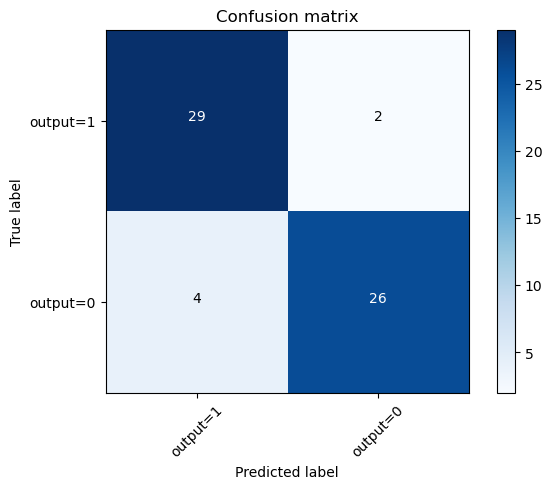

In [87]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['output=1','output=0'],normalize=False, title='Confusion matrix')

## Using Decision Tree classifier

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
haTree = DecisionTreeClassifier(criterion='entropy',max_depth=4)
haTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [110]:
haTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [111]:
Yhat = haTree.predict(X_test)
Yhat

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [112]:
import sklearn.tree as tree

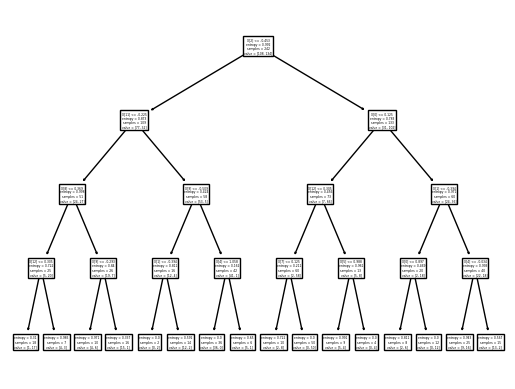

In [113]:
tree.plot_tree(haTree)
plt.show()

In [118]:
#prediction on trainig data
Yhat_train = haTree.predict(X_train)
print('Train accuracy:',metrics.accuracy_score(y_train,Yhat_train))

Train accuracy: 0.871900826446281


In [119]:
dec_acc_score = metrics.accuracy_score(y_test, Yhat)
print('Decision tree accuracy score on testing data', dec_acc_score)

Decision tree accuracy score on testing data 0.8852459016393442


In [117]:
dec_conf_matrix = confusion_matrix(y_test,Yhat)
print('confusion matrix:\n', dec_conf_matrix)

confusion matrix:
 [[27  3]
 [ 4 27]]


## Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression

In [122]:
LR = LogisticRegression(C=0.01,solver = 'liblinear')
lrTree = LR.fit(X_train,y_train)
lrTree

LogisticRegression(C=0.01, solver='liblinear')

In [124]:
lr_yhat_train = LR.predict(X_train)
lr_yhat_test = LR.predict(X_test)

lr_yhat_train_acc = metrics.accuracy_score(y_train,lr_yhat_train)
lr_yhat_test_acc = metrics.accuracy_score(y_test,lr_yhat_test)

print('Logistic Regression Training Accuracy:', lr_yhat_train_acc)
print('Logistic Regression Testing Accuracy:', lr_yhat_test_acc)

Logistic Regression Training Accuracy: 0.8223140495867769
Logistic Regression Testing Accuracy: 0.9016393442622951


In [125]:
lr_conf_matrix = confusion_matrix(y_test,lr_yhat_test)
lr_conf_matrix

array([[26,  4],
       [ 2, 29]], dtype=int64)

## Support Vector Machine

In [126]:
from sklearn import svm

In [130]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [131]:
yhat_svc_train = clf.predict(X_train)
yhat_svc_test = clf.predict(X_test)

In [133]:
#accuracy
print('Training accuracy:', metrics.accuracy_score(y_train,yhat_svc_train))
print('Test accuracy:', metrics.accuracy_score(y_test,yhat_svc_test))

Training accuracy: 0.8512396694214877
Test accuracy: 0.9180327868852459


In [135]:
svm_conf_matrix = confusion_matrix(y_test,yhat_svc_test)
svm_conf_matrix

array([[27,  3],
       [ 2, 29]], dtype=int64)

In [136]:
print(classification_report(y_test,yhat_svc_test))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        30
           1       0.91      0.94      0.92        31

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



## Using Random Forest Classifier

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
rf = RandomForestClassifier(n_estimators = 20, criterion='entropy', max_depth = 5, random_state = 1)

In [190]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=20,
                       random_state=1)

In [191]:
rf_yhat_train = rf.predict(X_train)
rf_yhat_test = rf.predict(X_test)

In [192]:
# Accuracy
print('Training accuracy:', metrics.accuracy_score(y_train,rf_yhat_train))
print('Test accuracy:', metrics.accuracy_score(y_test,rf_yhat_test))

Training accuracy: 0.9214876033057852
Test accuracy: 0.8852459016393442


In [160]:
print('Confusion Matrix:\n', confusion_matrix(y_test,rf_yhat_test))

Confusion Matrix:
 [[25  5]
 [ 2 29]]


In [161]:
print('Classification Report:', classification_report(y_test,rf_yhat_test))

Classification Report:               precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.85      0.94      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



### Comparing Model Evaluation

In [175]:
model_ev = pd.DataFrame({'Model':['K-Nearest Neighbour','Decision Tree','Logistic Regression','Support Vector Machine','Random Forest'],
                        'Accuracy':[metrics.accuracy_score(y_test,yhat)*100,dec_acc_score*100,lr_yhat_test_acc*100,metrics.accuracy_score(y_test,yhat_svc_test)*100,metrics.accuracy_score(y_test,rf_yhat_test)*100]})

In [176]:
model_ev

,Model,Accuracy
0,K-Nearest Neighbour,90.163934
1,Decision Tree,88.524590
2,Logistic Regression,90.163934
3,Support Vector Machine,91.803279
4,Random Forest,88.524590


#### by comparing the 5 machine learning model it is clear that the support vector machine has given the highest accuracy for precting heart attack
